In [1]:
#Import Relevant Keras Deep Learning Modules
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.models import load_model
from keras import backend as K

#Import Relevant Data Science Modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
#Build Model Using Keras
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
__________

In [4]:
#Training data
path2dat = "C:/Users/alex/Hands-On-Machine Learning/Project - Mammography/Data/Processed/"
train_images = np.load(path2dat + "train_images1.npy")
train_labels = np.load(path2dat + "train_labels.npy")
validation_images = np.load(path2dat + "validation_images.npy")
validation_labels = np.load(path2dat + "validation_labels.npy")

In [5]:
#Compile model
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
#Dont run this unless you have TF-gpu
history = model.fit(train_images, train_labels, 
          validation_data = (validation_images,validation_labels), 
          shuffle=True,
          epochs= 100,
          batch_size=64)

Train on 92405 samples, validate on 7682 samples
Epoch 1/100
92405/92405 [==============================] - 286s 3ms/step - loss: 0.5188 - acc: 0.7466 - val_loss: 0.4322 - val_acc: 0.7847
Epoch 2/100
92405/92405 [==============================] - 279s 3ms/step - loss: 0.4251 - acc: 0.8102 - val_loss: 0.3424 - val_acc: 0.8411
Epoch 3/100
92405/92405 [==============================] - 281s 3ms/step - loss: 0.3945 - acc: 0.8251 - val_loss: 0.3368 - val_acc: 0.8385
Epoch 4/100
92405/92405 [==============================] - 282s 3ms/step - loss: 0.3747 - acc: 0.8336 - val_loss: 0.3490 - val_acc: 0.8295
Epoch 5/100
92405/92405 [==============================] - 282s 3ms/step - loss: 0.3627 - acc: 0.8387 - val_loss: 0.3639 - val_acc: 0.8170
Epoch 6/100
92405/92405 [==============================] - 276s 3ms/step - loss: 0.3532 - acc: 0.8443 - val_loss: 0.3744 - val_acc: 0.7982
Epoch 7/100
92405/92405 [==============================] - 276s 3ms/step - loss: 0.3457 - acc: 0.8480 - val_loss: 0.3

92405/92405 [==============================] - 279s 3ms/step - loss: 0.2647 - acc: 0.8912 - val_loss: 0.2221 - val_acc: 0.9024
Epoch 60/100
92405/92405 [==============================] - 278s 3ms/step - loss: 0.2650 - acc: 0.8915 - val_loss: 0.2191 - val_acc: 0.9091
Epoch 61/100
92405/92405 [==============================] - 270s 3ms/step - loss: 0.2644 - acc: 0.8917 - val_loss: 0.2606 - val_acc: 0.8736
Epoch 62/100
92405/92405 [==============================] - 270s 3ms/step - loss: 0.2635 - acc: 0.8917 - val_loss: 0.3538 - val_acc: 0.8297
Epoch 63/100
92405/92405 [==============================] - 270s 3ms/step - loss: 0.2627 - acc: 0.8924 - val_loss: 0.2088 - val_acc: 0.9090
Epoch 64/100
92405/92405 [==============================] - 270s 3ms/step - loss: 0.2633 - acc: 0.8918 - val_loss: 0.2394 - val_acc: 0.8925
Epoch 65/100
92405/92405 [==============================] - 270s 3ms/step - loss: 0.2623 - acc: 0.8933 - val_loss: 0.2288 - val_acc: 0.9030
Epoch 66/100
92405/92405 [=======

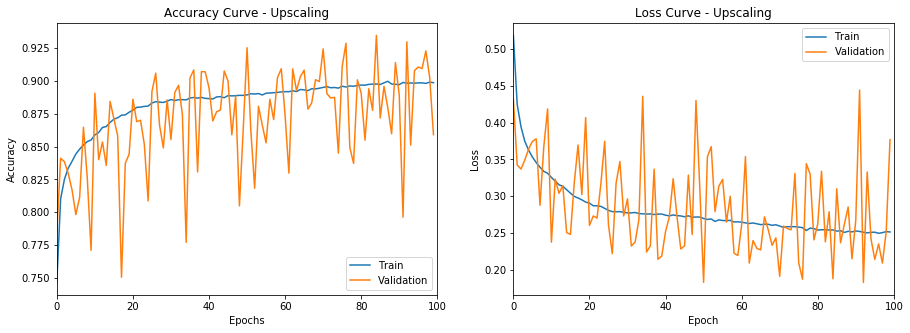

In [22]:
# summarize history for accuracy
def plot_val_acc(results,title):
    plt.plot(results.history['acc'])
    plt.plot(results.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='lower right')

def plot_loss_acc(results,title):
    plt.plot(results.history['loss'])
    plt.plot(results.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

def plot_validation(results):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plot_val_acc(history,title="Accuracy Curve - Upscaling")
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    plt.xlim((0, 100))
    plt.subplot(1,2,2)
    plot_loss_acc(history,title="Loss Curve - Upscaling")
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    plt.xlim((0, 100))
    plt.show()

hist_plot = plot_validation(history)

In [8]:
#Save output
path2out = "C:/Users/alex/Hands-On-Machine Learning/Project - Mammography/Models/"
model.save(path2out + 'Shallower_CNN_Case1_Layered.h5')
model.save_weights(path2out + 'Shallower_CNN_Case1_Wts_Layered.h5')
np.save(path2out + "Shallower_CNN_Case1_Hist_Layered.npy",history.history)
#history = np.load(path2out + "Shallow_CNN_Case1_Hist.npy")
#history.item()['val_loss']

In [9]:
#Confusion Matrix 
predictions = model.predict(validation_images,batch_size=5)

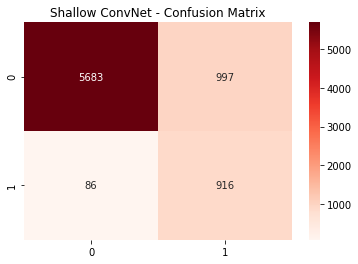

In [37]:
#Plot Confusion Matrix
def plot_confusion_matrix(train,predicted,name=""):
    confmat = confusion_matrix(train,predicted)
    sns.heatmap(confmat,cmap="Reds",fmt='g',annot=True).set_title(name + " - Confusion Matrix")


predicted = (predictions >= 0.5)*1

plot_confusion_matrix(validation_labels,predicted,name="Shallow ConvNet")
#False positive rate is high at 15% and false negative is 3%

In [11]:
np.save(path2out + "Shallower_CNN_Case1_ValPred_Layered.npy",predictions)

In [12]:
def plot_features(model,input_image):
    # Extracts the outputs of the top 6 layers:
    layer_outputs = [layer.output for layer in model.layers[:6]]
    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    img_tensor = image.img_to_array(input_image)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    # Remember that the model was trained on inputs
    # that were preprocessed in the following way:
    #img_tensor /= 255.
    activations = activation_model.predict(img_tensor)

    layer_names = []
    for layer in model.layers:
        layer_names.append(layer.name)

    images_per_row = 8
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names, activations):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]
        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]
        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
        scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.axis("off")
        plt.imshow(display_grid, cmap='viridis')

c:\users\alex\miniconda3\envs\tf-gpu3.6\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


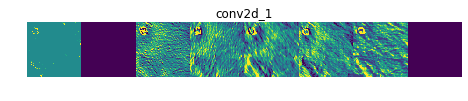

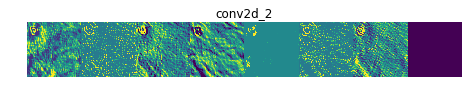

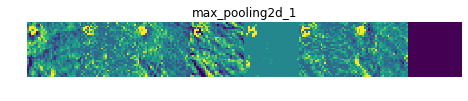

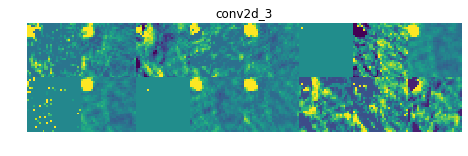

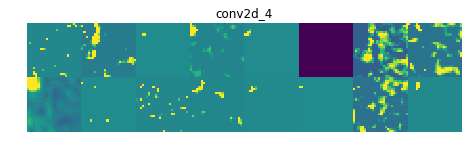

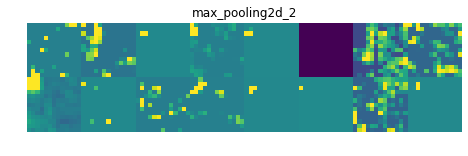

In [13]:
#path2dat = "C:/Users/alex/Hands-On-Machine Learning/Project - Mammography/Models/"
#model = load_model(path2dat + 'Shallower_CNN_Case1.h5')
#path2dat = "C:/Users/alex/Hands-On-Machine Learning/Project - Mammography/Data/Processed/"
#validation_images = np.load(path2dat + "validation_images.npy")
#validation_labels = np.load(path2dat + "validation_labels.npy")
plot_features(model,validation_images[33])

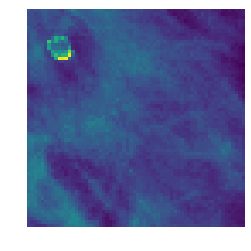

In [14]:
plt.axis('off')
plt.imshow(validation_images[33,:,:,1])
plt.show()

In [15]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [16]:
def generate_pattern(model,layer_name, filter_index, size=64):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]
    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3))
    # Run gradient ascent for 40 steps
    step = 1.
    
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [17]:
def plot_feature_map(model,height,width,figscale,layer_name):
    fig, ax = plt.subplots(height,width, 
                           sharex='col', 
                           sharey='row',
                           gridspec_kw = {'wspace':0, 'hspace':0},
                           figsize=(height*figscale,(height*height*figscale)/width))
    #fig.subplots_adjust(wspace=0, hspace=0)
    # axes are in a two-dimensional array, indexed by [row, col]
    for i in range(height):
        for j in range(width):
            ax[i, j].axis('off')
            ax[i, j].set_aspect('equal')  
            filter_img = generate_pattern(model,layer_name, j + i*width)
            ax[i, j].imshow(filter_img)

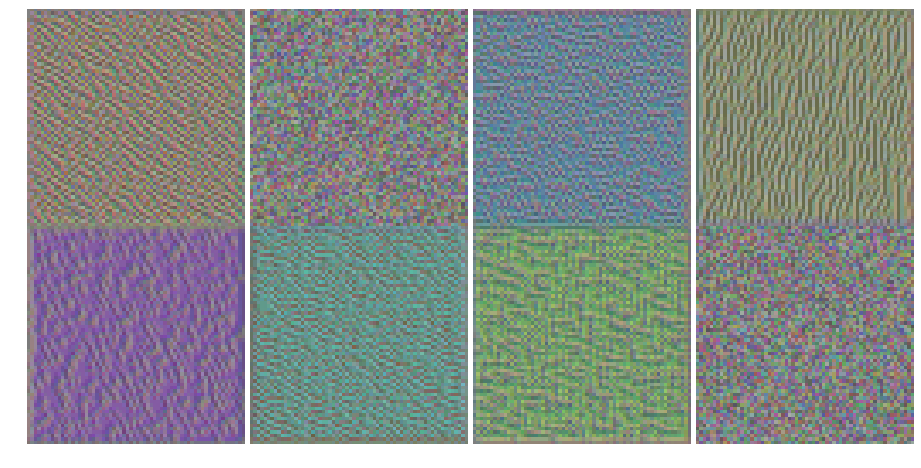

In [18]:
plot_feature_map(model,2,4,8,"conv2d_1")

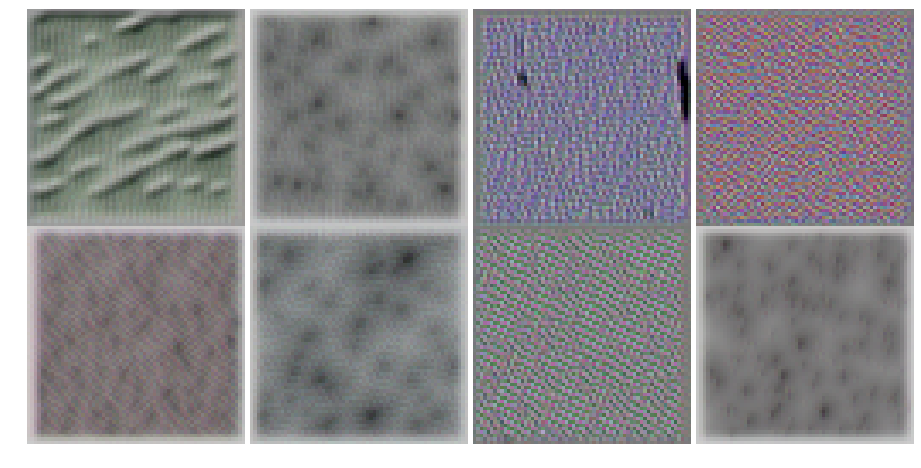

In [19]:
plot_feature_map(model,2,4,8,"conv2d_2")

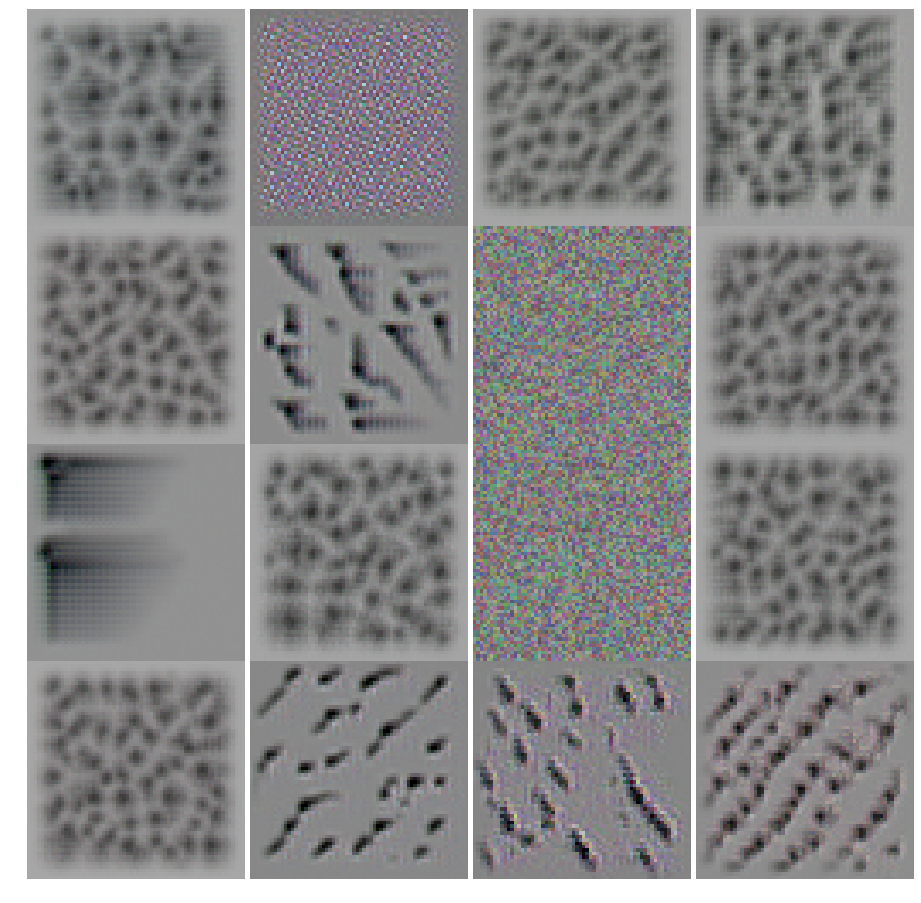

In [20]:
plot_feature_map(model,4,4,4,"conv2d_3")

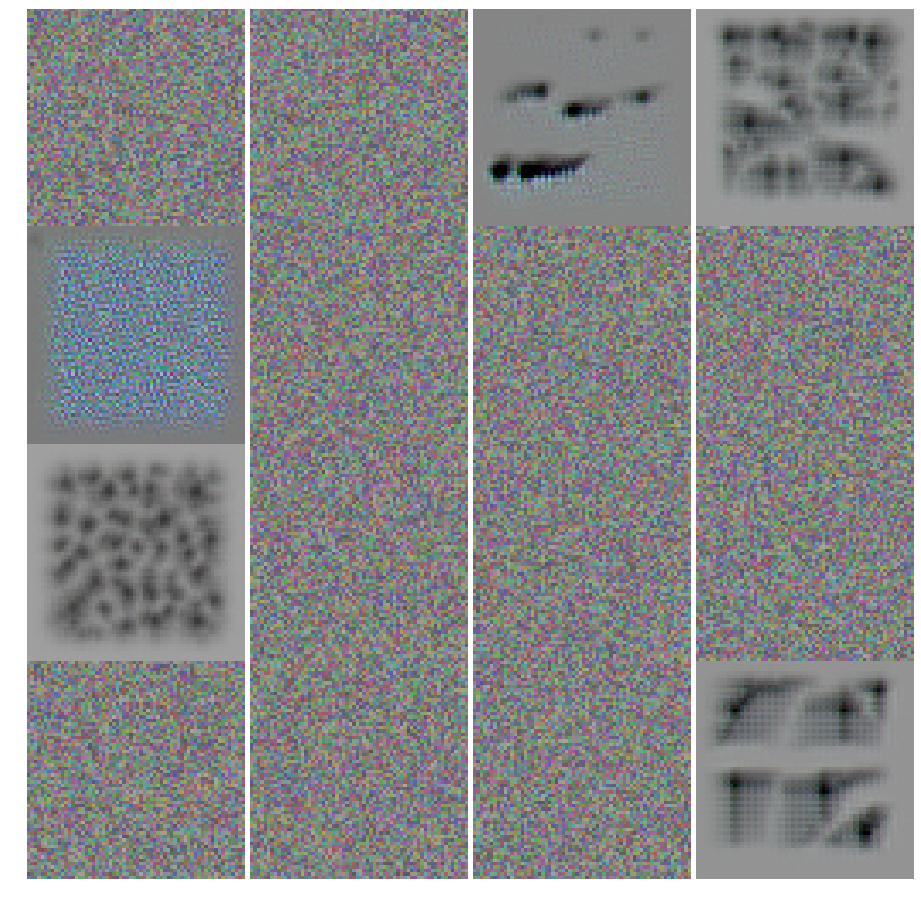

In [21]:
plot_feature_map(model,4,4,4,"conv2d_4")

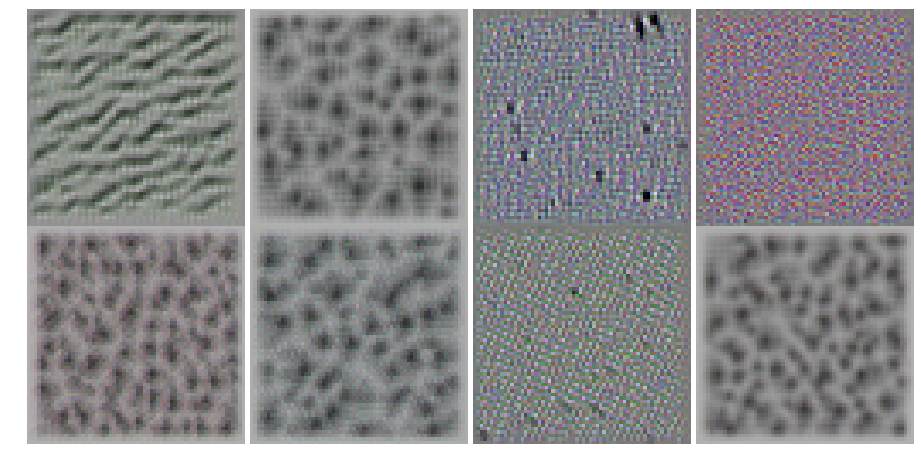

In [24]:
plot_feature_map(model,2,4,8,"max_pooling2d_1")

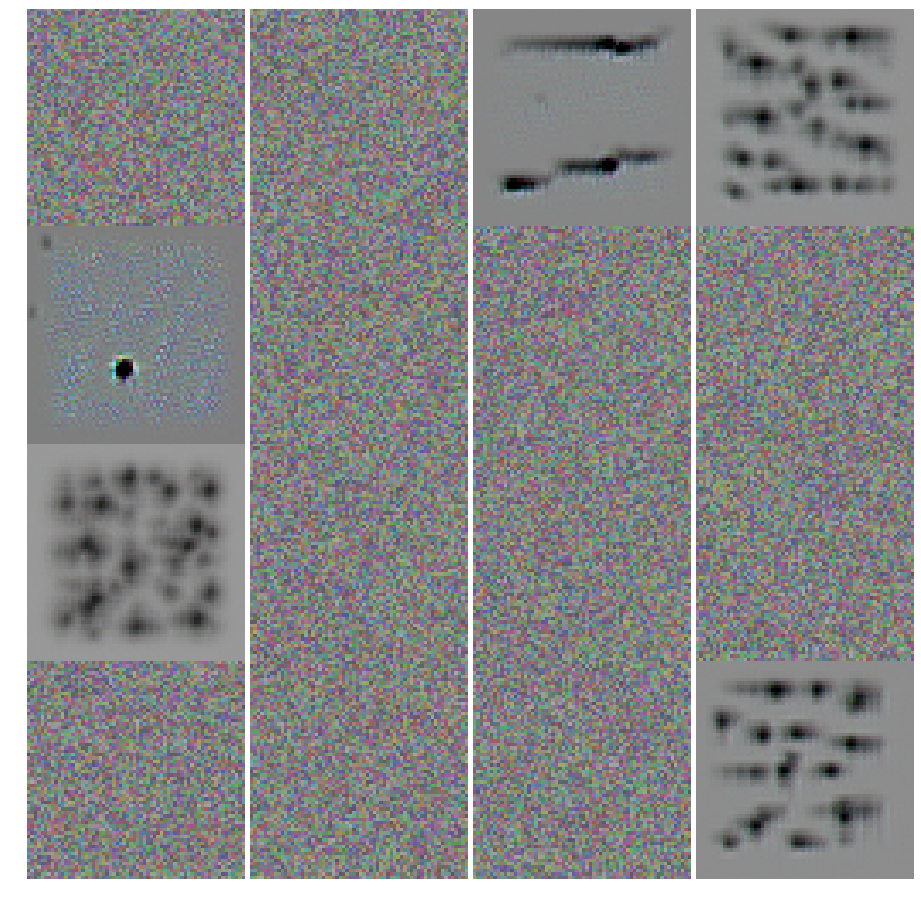

In [25]:
plot_feature_map(model,4,4,4,"max_pooling2d_2")

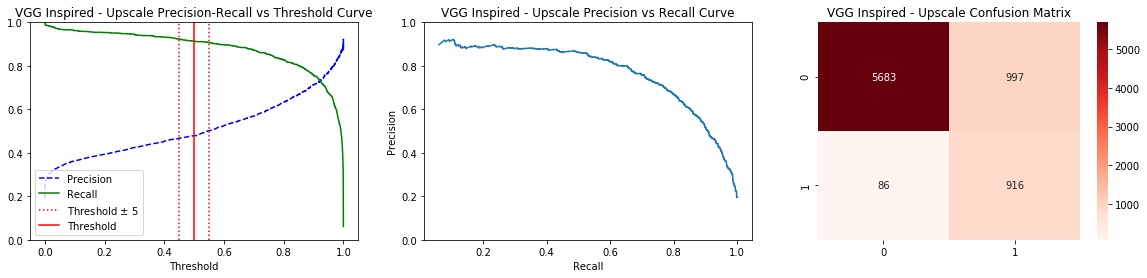

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

#Plot Precision/Recall vs Threshold Curves
def plot_precision_recall_vs_threshold(train,proba,name=""):
    precisions, recalls, thresholds = precision_recall_curve(train,proba)
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.axvline(x=0.45,linestyle=':',color="Red",label=r"Threshold $\pm$ 5")
    plt.axvline(x=0.5,color="Red",label="Threshold")
    plt.axvline(x=0.55,linestyle=':',color="Red")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0, 1])
    plt.title(name + " Precision-Recall vs Threshold Curve")

#Plot Precision vs Recall
def plot_precision_vs_recall(train,proba,name=""):
    precisions, recalls, thresholds = precision_recall_curve(train,proba)
    plt.plot(recalls[:-1],precisions[:-1],"-")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(name + " Precision vs Recall Curve")
    plt.ylim([0, 1])

#Plot Confusion Matrix
def plot_confusion_matrix(train,predicted,name=""):
    confmat = confusion_matrix(train,predicted)
    sns.heatmap(confmat,cmap="Reds",fmt='g',annot=True).set_title(name + " Confusion Matrix")

#Plot Precesion Recall graphs and Confusion Matrices on a grid side by side
def prt_confusion(train,proba,predicted,name=""):
    plt.figure(figsize=(20, 4))
    plt.subplot(1,3,1)
    plot_precision_recall_vs_threshold(train,proba,name)
    plt.subplot(1,3,2)
    plot_precision_vs_recall(train,proba,name)
    plt.subplot(1,3,3)
    plot_confusion_matrix(train,predicted,name)
    plt.show()

#Generate Plots
prt_confusion(train = validation_labels,
              predicted = np.squeeze(np.transpose(predicted)),
              proba = np.squeeze(np.transpose(predictions)),
              name = "VGG Inspired - Upscale")